### loading the packages

In [ ]:
!pip install sentence_transformers

In [ ]:
!pip install tweet-preprocessor

In [ ]:
import os
import pandas as pd
from sentence_transformers import SentenceTransformer
embedder = SentenceTransformer('all-mpnet-base-v2')

import re
import preprocessor as p

from sklearn.cluster import KMeans,DBSCAN
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

### Read the data

In [ ]:
df = pd.read_csv('train_E6oV3lV.csv')
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [ ]:
# custum function to clean the dataset (combining tweet_preprocessor and reguar expression)
def clean_tweets(df):
    #set up punctuations we want to be replaced
    REPLACE_NO_SPACE = re.compile("(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\")|(\|)|(\()|(\))|(\[)|(\])|(\%)|(\$)|(\>)|(\<)|(\{)|(\})")
    REPLACE_WITH_SPACE = re.compile("(<br\s/><br\s/?)|(-)|(/)|(:).")
    tempArr = []
    for line in df:
        # send to tweet_processor
        tmpL = p.clean(line)
        # remove puctuation
        tmpL = REPLACE_NO_SPACE.sub("", tmpL.lower()) # convert all tweets to lower cases
        tmpL = REPLACE_WITH_SPACE.sub(" ", tmpL)
        tempArr.append(tmpL)
    return tempArr

In [ ]:
# cleaning the tweets
df['clean tweet'] = clean_tweets(df['tweet'])
df.head()

,id,label,tweet,clean tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so selfi...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for credit i cant use cause they dont o...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,i love u take with u all the time in ur
4,5,0,factsguide: society now #motivation,factsguide society now


In [ ]:
# df_new = pd.concat([df[df['label']==0].head(3000),df[df['label']==1].head(3000)])

In [ ]:
df_new  = df

In [ ]:
corpus = list(df_new['clean tweet'])

In [ ]:
# corpus = list(df['clean tweet'])
corpus = corpus[0:2500]

### Clustering

In [ ]:
corpus_embeddings = embedder.encode(corpus)

In [ ]:
corpus_embeddings

array([[-0.01262879, -0.08554128, -0.00215527, ..., -0.01402152,
         0.04337455,  0.00803245],
       [-0.01318973,  0.03821636, -0.00254431, ..., -0.01793461,
        -0.05538307, -0.01866081],
       [-0.00775568,  0.07722815,  0.0005866 , ...,  0.02464666,
        -0.01153191, -0.00170155],
       ...,
       [ 0.01449721, -0.01218287,  0.00336315, ...,  0.0028057 ,
        -0.06073666, -0.03852037],
       [ 0.01741464, -0.02171977, -0.00925816, ..., -0.02802304,
        -0.0119298 , -0.03226652],
       [ 0.01552133,  0.01094939, -0.01124844, ...,  0.00191322,
        -0.0097801 , -0.0240514 ]], dtype=float32)

In [ ]:
pca = PCA(n_components=2)
corpus_embeddings= pca.fit_transform(corpus_embeddings)


In [ ]:
num_clusters = 2
clustering_model = KMeans(n_clusters=num_clusters)
clustering_model.fit(corpus_embeddings)
cluster_assignment = clustering_model.labels_
cluster_assignment

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 0, ..., 0, 0, 1], dtype=int32)

In [ ]:
cluster_df = pd.DataFrame(corpus, columns = ['corpus'])
cluster_df['cluster'] = cluster_assignment
cluster_df.head()

,corpus,cluster
0,when a father is dysfunctional and is so selfi...,1
1,thanks for credit i cant use cause they dont o...,1
2,bihday your majesty,0
3,i love u take with u all the time in ur,0
4,factsguide society now,1


In [ ]:
cluster_df['label'] = df['label']

In [ ]:
accuracy_score(cluster_df['label'],cluster_df['cluster'])

0.5752

In [ ]:
clustered_sentences = [[] for i in range(num_clusters)]
for sentence_id, cluster_id in enumerate(cluster_assignment):
    clustered_sentences[cluster_id].append(corpus[sentence_id])

for i, cluster in enumerate(clustered_sentences):
    print("Cluster ", i+1)
    print(cluster)
    print("")

Cluster  1
['bihday your majesty', 'i love u take with u all the time in ur', 'camping tomorrow danny', 'the next school year is the year for exams cant think about that', 'we won love the land', 'welcome here  im its so ', 'i get to see my daddy today', 'i am thankful for having a paner', 'its  smiles all around via ig user make people', 'product of the day happy man tool whos its the  time to open up &amp drink up', 'to my ', 'beautiful sign by vendor for 4500', 'all when is  in  sunday love', 'happy fathers day', 'rip to the fellow nohern ireland fan who sadley passed away tonight gawa forever singing and cheering on fire', 'it was a hard monday due to cloudy weather disabling oxygen production for today', 'morning~~', 'oh  waited hours in the valravn line and it stopped working we were so close', 'i am thankful for sunshine', 'when you finally finish a book youve been working on for awhile', 'my mom shares the same bihday as bihday snake see you this weekend', 'lovely echeveria blo

In [ ]:
#word cloud
def word_cloud(pred_df,label):
    wc = ' '.join([text for text in pred_df['corpus'][pred_df['cluster'] == label]])
    wordcloud = WordCloud(width=800, height=500,
    random_state=21, max_font_size=110).generate(wc)
    fig7 = plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')

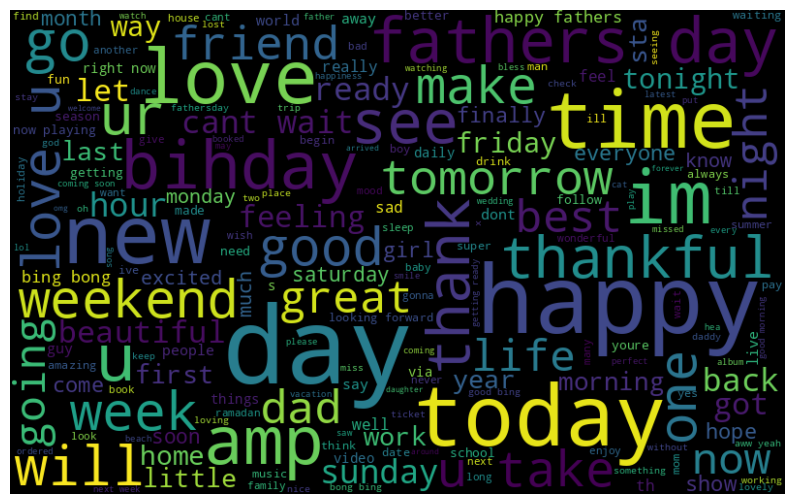

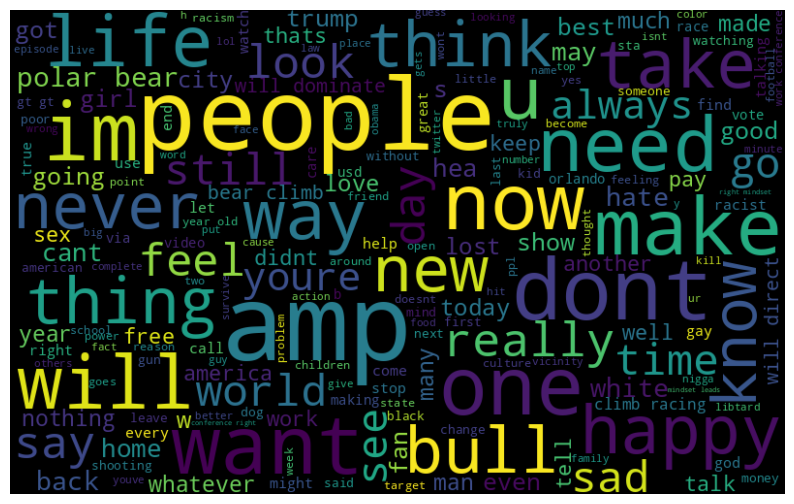

In [ ]:
for i in range(0,2):
  word_cloud(cluster_df,i)

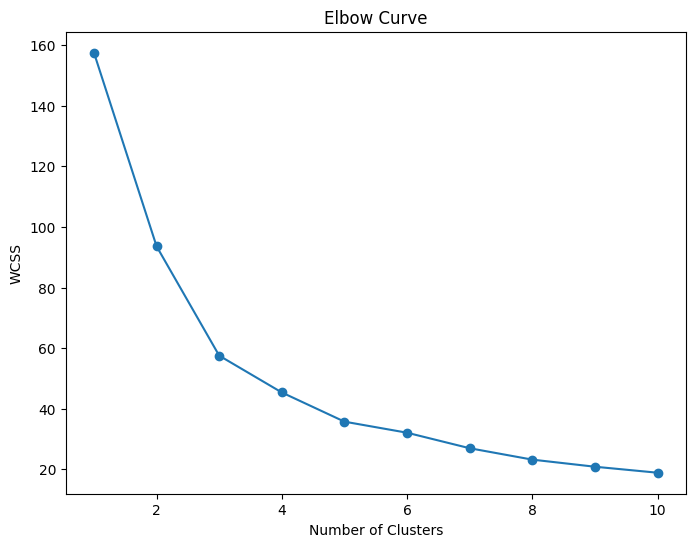

In [ ]:
# Determine optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init='auto')
    kmeans.fit(corpus_embeddings)
    wcss.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(8,6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
num_clusters = 6
clustering_model = KMeans(n_clusters=num_clusters)
clustering_model.fit(corpus_embeddings)
cluster_assignment = clustering_model.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
cluster_assignment

array([4, 1, 5, ..., 0, 2, 4], dtype=int32)

In [ ]:
db = DBSCAN(eps=0.1, min_samples=3).fit(corpus_embeddings)
db.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
cluster_df = pd.DataFrame(corpus, columns = ['corpus'])
cluster_df['cluster'] = cluster_assignment
cluster_df.head()

,corpus,cluster
0,when a father is dysfunctional and is so selfi...,4
1,thanks for credit i cant use cause they dont o...,1
2,bihday your majesty,5
3,i love u take with u all the time in ur,2
4,factsguide society now,1


In [ ]:
cluster_df['label'] = df['label']

In [ ]:
cluster_df

,corpus,cluster,label
0,when a father is dysfunctional and is so selfi...,4,0
1,thanks for credit i cant use cause they dont o...,1,0
2,bihday your majesty,5,0
3,i love u take with u all the time in ur,2,0
4,factsguide society now,1,0
...,...,...,...
2495,been feeling pretty good about myself the past...,5,0
2496,rd ramadan how fast this ramadan is going off,0,0
2497,been back in studio recording my second single...,0,0
2498,i am thankful for love,2,0


In [ ]:
accuracy_score(cluster_df['label'],cluster_df['cluster'])

0.178

### Result

In [ ]:
clustered_sentences = [[] for i in range(num_clusters)]
for sentence_id, cluster_id in enumerate(cluster_assignment):
    clustered_sentences[cluster_id].append(corpus[sentence_id])

for i, cluster in enumerate(clustered_sentences):
    print("Cluster ", i+1)
    print(cluster)
    print("")

Cluster  1
['camping tomorrow danny', 'the next school year is the year for exams cant think about that', 'oh  waited hours in the valravn line and it stopped working we were so close', 'getting ready remove the victums frm', 'off to concelebrate at the for the first time', 'ascot times with this babe', 'the weekendis here', 'we are ready to dance', 'im sure they are just as happy hour', 'our new brochures have arrived how exciting', 'woohoo just over weeks to go', 'ready to rehearse tonight with new music and new videos look out for the announcement', 'watching the new episodes of on', 'omg loving this station way to jam out at work while getting work done of course', 'on that day edwardsville pennsylvania', 'personalised we gbp get here', 'not long now', 'going to la tomorrow', 'just received dis from cant wait to sta baking ', 'sunday', 'off to work', 'laps of pool k ride done and picked up a gym membership form', '146604726015 update', 'bihday', 'just found out is at after id been 

### Lets Visualize the data !!!

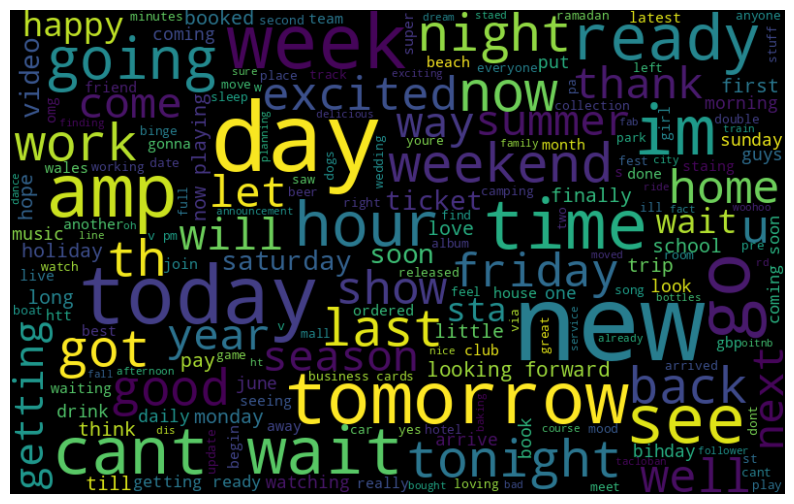

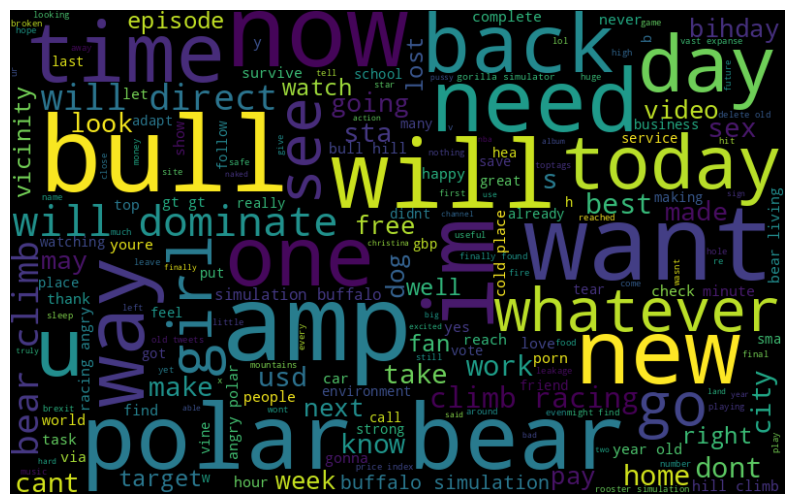

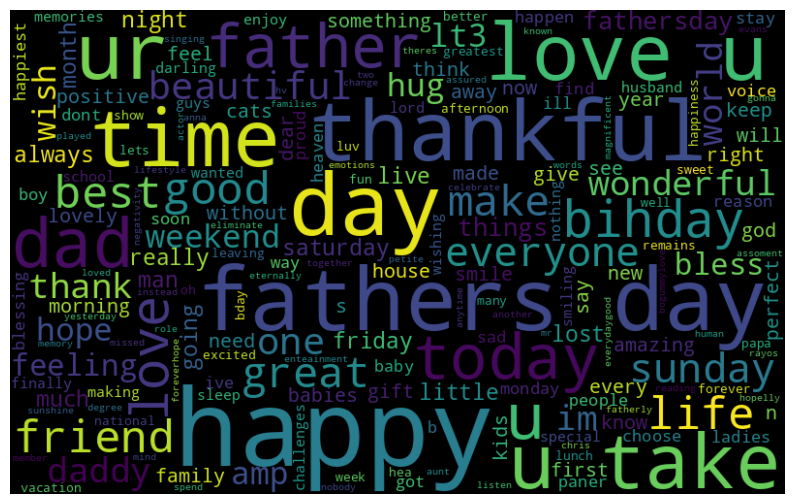

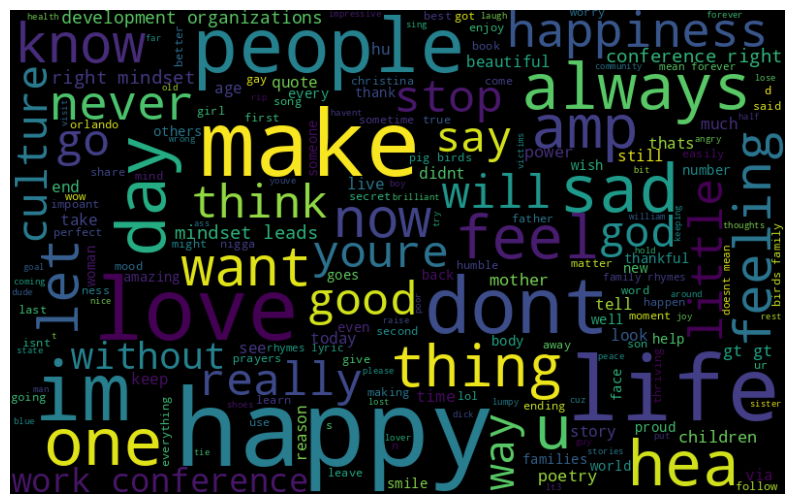

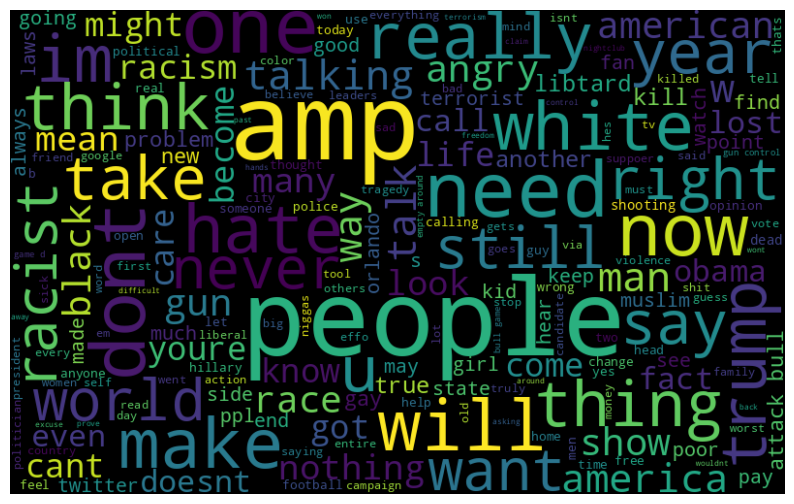

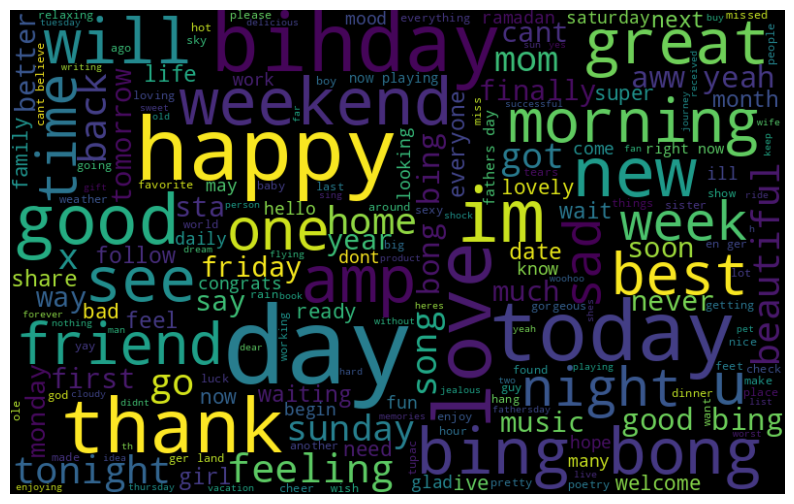

In [ ]:
for i in range(0,6):
  word_cloud(cluster_df,i)